In [1]:
# Import libraries
import pandas as pd 

In [2]:
def load_data():
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    html = pd.read_html(url, header = 0)
    df = html[0]
    return df  

In [25]:
df = load_data()
df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


## Examing the Sectors

In [4]:
sector_unique = df["GICS Sector"].unique()
sector_unique

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

In [5]:
len(sector_unique)

11

In [6]:
# group by sector
sector = df.groupby("GICS Sector")

In [7]:
# display first company for each sector
sector.first()

,Symbol,Security,SEC filings,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
GICS Sector,,,,,,,,
Communication Services,ATVI,Activision Blizzard,reports,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
Consumer Discretionary,AAP,Advance Auto Parts,reports,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
Consumer Staples,MO,Altria Group,reports,Tobacco,"Richmond, Virginia",1957-03-04,764180,1985
Energy,APA,APA Corporation,reports,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,6769,1954
Financials,AFL,Aflac,reports,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott Laboratories,reports,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
Industrials,MMM,3M,reports,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
Information Technology,ACN,Accenture,reports,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products & Chemicals,reports,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [8]:
sector.describe()

CIK                ...                       
                       count          mean  ...         75%        max
GICS Sector                                 ...                       
Communication Services  27.0  1.107343e+06  ...  1500907.50  1754301.0
Consumer Discretionary  63.0  8.477582e+05  ...  1164229.50  1590895.0
Consumer Staples        32.0  3.872794e+05  ...   789573.00  1679273.0
Energy                  21.0  7.674384e+05  ...  1163165.00  1701605.0
Financials              65.0  6.325087e+05  ...  1120193.00  1601712.0
Health Care             64.0  8.164259e+05  ...  1097811.75  1821825.0
Industrials             74.0  6.859374e+05  ...  1084970.50  1783180.0
Information Technology  74.0  9.119879e+05  ...  1326192.25  1730168.0
Materials               28.0  8.369064e+05  ...  1419355.00  1755672.0
Real Estate             29.0  8.957202e+05  ...  1053507.00  1393311.0
Utilities               28.0  8.035041e+05  ...  1036121.50  1711269.0

[11 rows x 8 columns]

In [9]:
# Examine data by sector
sector.get_group('Health Care')

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
11,A,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
17,ALGN,Align Technology,reports,Health Care,Health Care Supplies,"San Jose, California",2017-06-19,1097149,1997
...,...,...,...,...,...,...,...,...,...
474,VTRS,Viatris,reports,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
484,WAT,Waters Corporation,reports,Health Care,Health Care Distributors,"Milford, Massachusetts",NaN,1000697,1958
488,WST,West Pharmaceutical Services,reports,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


## Finance data

In [10]:
pip install yfinance

In [11]:
import yfinance as yf

In [12]:
# List of S&P 500 symbols
list(df.Symbol)

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMC

## Retrive Stock Data

In [13]:
# https://pypi.org/project/yfinance/

data = yf.download( # or pd.get_data_yahoo(...
        # tickers list or string as well
        tickers = list(df.Symbol),
    
        # use period instead of start/end
        # valid periods:1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optimal, default is "1mo")
        period = "ytd",
    
        # fetch data by interval by including if period < 60 days)
        # valid intervals: 1m,2m,5m,30m,60m,90m,1h,1d,1wk,1mo,3m
        # (optional, default is "1d")
        interval = "1d",
    
        # group by ticker (to access via data['SPY'])
        # (optional, default is "column")
        group_by = 'ticker',
    
        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,
    
        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,
    
        # use threads for mass downloading?(True/False/Integer)
        # (optional, default is True)
        threads = True,
    
        # proxy URL scheme use when dowloading
        # (optional, default is None)
        proxy = None
)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [14]:
data

GLW                        ...       EVRG                    
                 Open       High        Low  ...        Low      Close   Volume
Date                                         ...                               
2021-01-04  35.197420  35.373163  33.986748  ...  52.157199  52.361774  1564900
2021-01-05  34.133197  35.002148  34.084380  ...  51.855205  52.254616  1294900
2021-01-06  35.343871  36.681470  35.148601  ...  52.293588  53.306728  2703400
2021-01-07  36.378800  36.574071  35.841808  ...  51.738306  51.855206  2520600
2021-01-08  36.251877  36.349511  35.695358  ...  50.939484  51.631145  1889400
...               ...        ...        ...  ...        ...        ...      ...
2021-11-12  38.410000  39.279999  38.279999  ...  64.419998  64.500000   752100
2021-11-15  39.240002  39.240002  38.599998  ...  64.669998  65.599998   842200
2021-11-16  38.700001  39.049999  38.570000  ...  65.239998  65.379997   975100
2021-11-17  38.529999  38.689999  38.020000  ...  65.050003  65.699997  1119700
2021-11-18  38.310001  38.389999  37.830002  ...  63.889999  65.070000  2134900

[223 rows x 2527 columns]

In [15]:
# Data subset of quary symbol
data['AFL']

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,43.523768,43.621358,41.991654,42.147793,3111200
2021-01-05,42.284421,42.645491,41.923346,42.216106,2561700
2021-01-06,42.850423,44.109295,42.489352,43.845810,3842900
2021-01-07,44.089776,44.167843,43.377391,43.601841,4217400
2021-01-08,43.836052,43.904366,42.665012,43.416431,2915700
...,...,...,...,...,...
2021-11-12,56.026992,56.752811,55.867909,56.683208,2439300
2021-11-15,56.911891,57.428907,56.643439,57.239998,3433600
2021-11-16,57.669998,57.950001,57.200001,57.259998,3321200


In [26]:
# Set date as a column
df2 = pd.DataFrame(data['AFL'].Close)
df2['Date'] = df2.index
df2

,Close,Date
Date,,
2021-01-04,42.147793,2021-01-04
2021-01-05,42.216106,2021-01-05
2021-01-06,43.845810,2021-01-06
2021-01-07,43.601841,2021-01-07
2021-01-08,43.416431,2021-01-08
...,...,...
2021-11-12,56.683208,2021-11-12
2021-11-15,57.239998,2021-11-15
2021-11-16,57.259998,2021-11-16


## Plot closing price of query symbol

Text(0, 0.5, 'Closing Price')

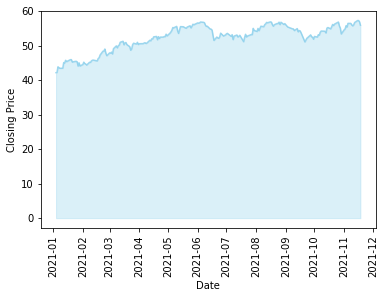

In [27]:
import matplotlib.pyplot as plt
plt.fill_between(df2.Date, df2.Close, color="skyblue", alpha=0.3)
plt.plot(df2.Date, df2.Close, color="skyblue", alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Closing Price")

In [28]:
def price_plot(symbol):
  df = pd.DataFrame(data[symbol].Close)
  df['Date'] = df.index
  plt.fill_between(df.Date, df.Close, color="skyblue", alpha=0.3)
  plt.plot(df.Date, df.Close, color="skyblue", alpha=0.8)
  plt.xticks(rotation=90)
  plt.title(symbol, fontweight='bold')
  plt.xlabel('Date', fontweight='bold')
  plt.ylabel('Closing Price', fontweight='bold')
  return plt.show()

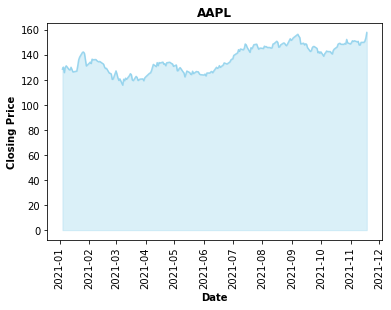

In [29]:
price_plot('AAPL')

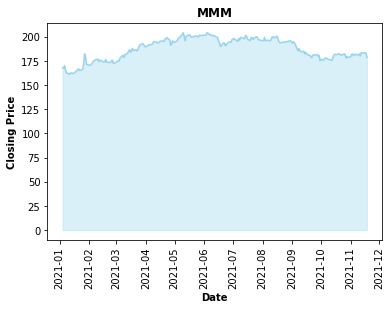

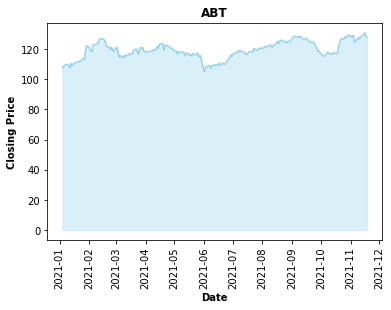

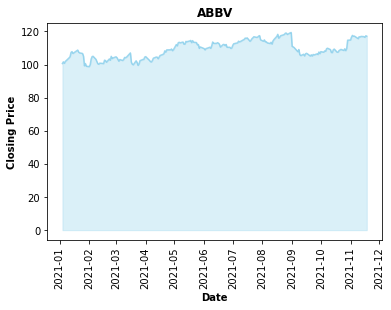

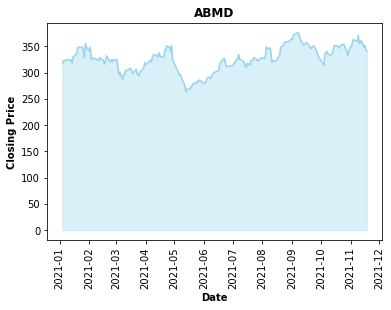

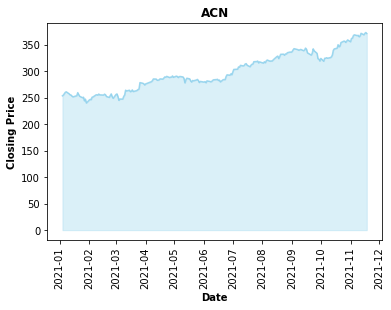

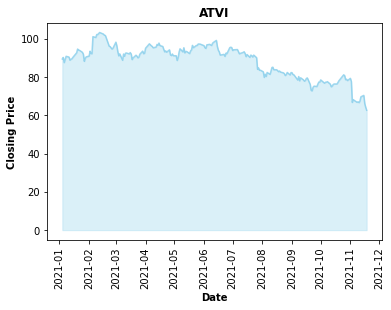

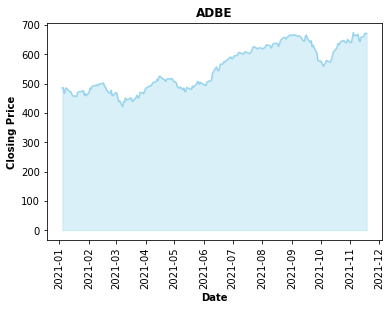

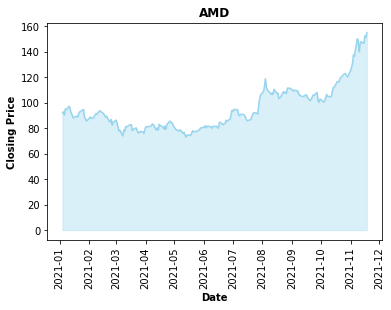

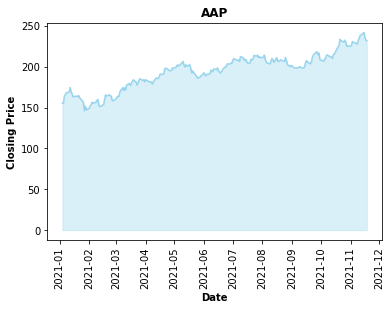

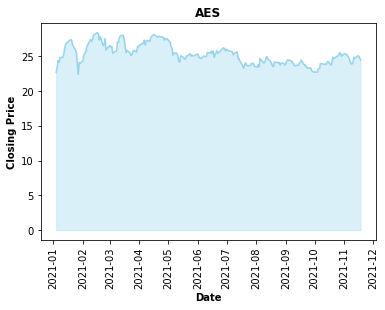

In [31]:
for i in list(df.Symbol)[:10]:
  price_plot(i)